Do the transfer learning on the model with a random object detection Dataset taken from Kaggle, UCI etc. ( Model performance and metrics will be checked, evaluate model performance and metrics, providing a concise overview of the model architecture and a thorough explanation of each step in adjacent Markdown. )

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam

In [ ]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [ ]:
print(data_dir)

/root/.keras/datasets/flower_photos


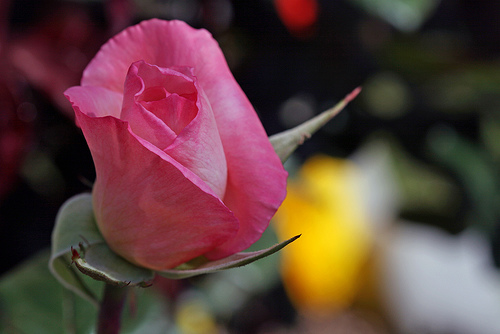

In [25]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

importing the dataset directly from the tensorflow url


In [ ]:
img_height, img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


spliting the dataset into training and testing and doing the image prsprocessing
from the data_dir dataset we are dividing the data again into training and validation set and marking the 1st set as training and reshaping the image dimensions to 180,180

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode='categorical',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


here we are labling the validation data
from the outputs we can observe out of 3670 2963 images are used for training and 734 for validation

In [29]:
class_names = train_ds.class_names

#Training the model



In this below code is where the transfer learning is applied on the model.
After this step we are making the model to learn the weights of new dataset and forget the weights of previous trained dataset

In [ ]:
resnet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',
                   classes=5,
                   weights='imagenet')

for  layer in pretrained_model.layers:
  layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512,activation='relu'))
resnet_model.add(Dense(5,activation='softmax'))

we are importing the Resnet50 model from the keras library,
as we are using the input model different from which it was trained we write 'include_top=False' which allows your dataset to input and train model,
in the 'for' loop we are now using the weights from the training before as the purpose of the model is compeltly different i.e, input and output layers are different which is usefull for saving the timecomplexty if the model
adding the pretrained model to our sequential model, flattening the data, and adding 2 dense layers



In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24639365 (93.99 MB)
Trainable params: 1051653 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


we can see we are only using the limitted no. of layers for traning model as the data is smaller compared to the original trained data of the model.


In [ ]:
resnet_model.compile(
    optimizer=Adam(lr=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [23]:
epochs=10
history = resnet_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 505s 5s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.3969 - val_accuracy: 0.8896
Epoch 2/10
92/92 [==============================] - 499s 5s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4027 - val_accuracy: 0.8883
Epoch 3/10
92/92 [==============================] - 495s 5s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.4085 - val_accuracy: 0.8910
Epoch 4/10
92/92 [==============================] - 488s 5s/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.4117 - val_accuracy: 0.8869
Epoch 5/10
92/92 [==============================] - 492s 5s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4167 - val_accuracy: 0.8910
Epoch 6/10
92/92 [==============================] - 532s 6s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4216 - val_accuracy: 0.8883
Epoch 7/10
92/92 [==============================] - 485s 5s/step - loss: 9.4535e-04 - accuracy: 1.0000 - val_loss: 0.4276 - val_accuracy: 0.8910
Epoch 8/1

we are fit the data into the model and started the training of the model with 10 epochs. we use the epochs to increase the accuracy of the model.
As the number of layers for the following dataset are too high we are getting high accuracy.

#Evaluating the Model

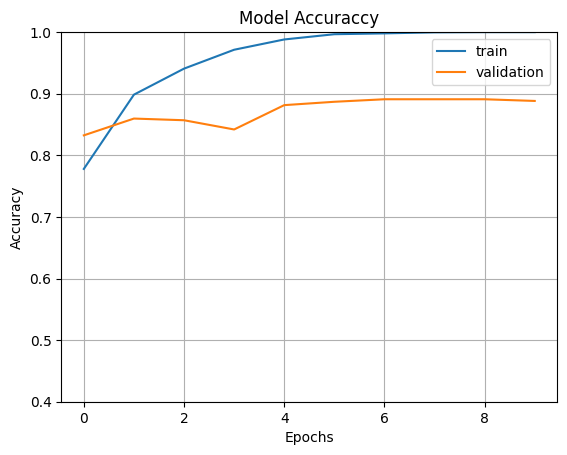

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuraccy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

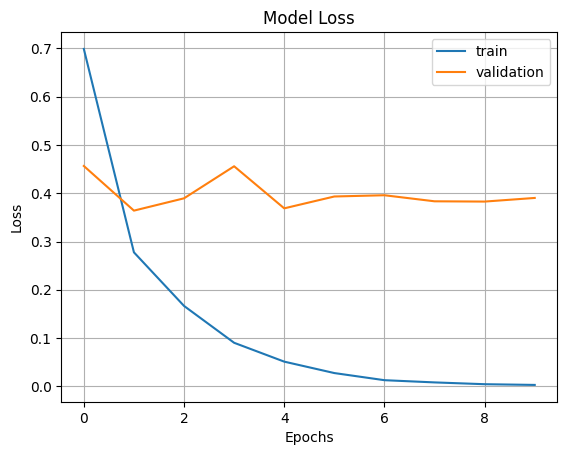

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.show()

#Making Predictions

In [26]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized=cv2.resize(image,(img_height, img_width))
image=np.expand_dims(image_resized,0)
print(image.shape)

(1, 180, 180, 3)


reading the images using imread function.
resizeing the images to 180,180 for matching it with traing data size.
adding 2 more dimenssions for the pedicting images as the model is trained on multiple images it can be difficult for model to pedicting the image with 3 dimensions

In [27]:
pred=resnet_model.predict(image)
print(pred)

1/1 [==============================] - 2s 2s/step
[[1.5488669e-07 1.8219548e-06 9.9581689e-01 7.3016038e-09 4.1811019e-03]]


we are using the '.predict' fucntions to predict the given image.
the softmax give the probablity of each class as a array of numbers.

In [30]:
output_class=class_names[np.argmax(pred)]
print(output_class)

roses


Here we are using output from the predictions to identify which class is having haigh predection rate.
That defines for which this image belongs to.